Step-1: Business Understanding

We would like to analyse which are the key features the price of an airbnb homestay in Seattle and if there are some trends that can be used to make prediction to find the best price of airbnb homestay. Answer to the below set of questions will help us to get there. 

Question-1: Which neighborhood has maximum presence of airbnb listing?

Question-2: How neighborhood influences the homestay price? 

Question-3: How property type influences the homestay price?

Question-4: How no of bedrooms influences the homestay price? 

Question-5: Which amenities are offered in various airbnb homestay? 

Question-6: Is it possible to predict price of a homestay with a set of features? 

In [1]:
# All necesary import goes here. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading dataset in python dataframe
df_listing = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')

Step-2 - Data Understanding - Let us look at the listing, calender and reviews data.

In [3]:
# Look into the listing data
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
# Get first 5 rows
df_listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# Describe the dataframe

df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
# Get shape of the dataframe
print("No of Rows = ", df_listing.shape[0])
print("No of Columns = ", df_listing.shape[1])

No of Rows =  3818
No of Columns =  92


In [7]:
# Look into the calender data
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [9]:
df_calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [10]:
df_calendar.shape

(1393570, 4)

In [11]:
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [12]:
# Look into the reviews data
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [13]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [14]:
df_reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [15]:
df_reviews.shape

(84849, 6)

In [16]:
df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

Step-3: Data Preparation & Cleaning - Here we will be looking for missing values, wrong data types, unnecessary features that can be dropped.

In [17]:
# Remove $ symbol from price column
df_calendar["price"] = df_calendar["price"].str.strip("$")
df_calendar["price"] = [float(str(i).replace(",", "")) for i in df_calendar["price"]]
df_calendar["price"]

0          85.0
1          85.0
2           NaN
3           NaN
4           NaN
           ... 
1393565     NaN
1393566     NaN
1393567     NaN
1393568     NaN
1393569     NaN
Name: price, Length: 1393570, dtype: float64

In [18]:
# Find % of missing values 

def missing_values(df):
    """
    Computes the percentage of missing values for each column in the dataframe
    Input: 
    df = a dataframe which has missing values 
    Return: 
    percentage = returns percentage as float
    """
        
    percentage = df.isna().sum()/df.shape[0]
    return percentage 

print("% of missing values: \n", missing_values(df_calendar))

% of missing values: 
 listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64


We will not drop them as there 32.9% are missing. Possible reason may be accommodation was not available at that time. 

Question-1: Which neighborhood has maximum presence of airbnb listing? 

In [19]:
# Check neighbourhood data - Get 15 cities from highest listing
df_listing.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(15)

,id
neighbourhood_cleansed,
Broadway,397
Belltown,234
Wallingford,167
Fremont,158
Minor,135
University District,122
Stevens,119
First Hill,108
Central Business District,103


Answer-1: Broadway has the highest number of airbnb listing. 

Question-2: How neighborhood influences the homestay price? 

In [20]:
# Check price column
df_listing['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [21]:
# Check various stats of price column
df_listing['price'].describe()

count        3818
unique        273
top       $150.00
freq          162
Name: price, dtype: object

Need to remove the $ symbol. 

In [22]:
df_listing['price'] = df_listing['price'].str.replace(',', '')
df_listing['price'] = df_listing['price'].str.replace('$', '')
df_listing['price'] = df_listing['price'].astype(float)

# Check the column again
df_listing['price']

C:\Users\Anindya Chaudhuri\AppData\Local\Temp\ipykernel_16644\2720639147.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listing['price'] = df_listing['price'].str.replace('$', '')


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

Text(0.5, 1.0, 'Histogram of Listing Prices')

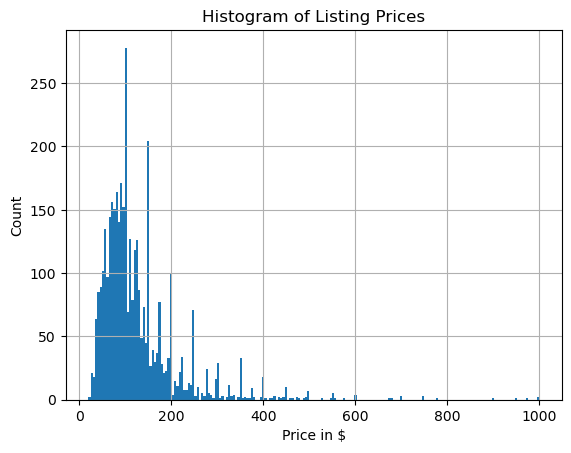

In [23]:
# Price distribution of homestay listing
df_listing.price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Price in $')
plt.title('Histogram of Listing Prices')

Text(0.5, 1.0, 'Histogram of Listing Prices')

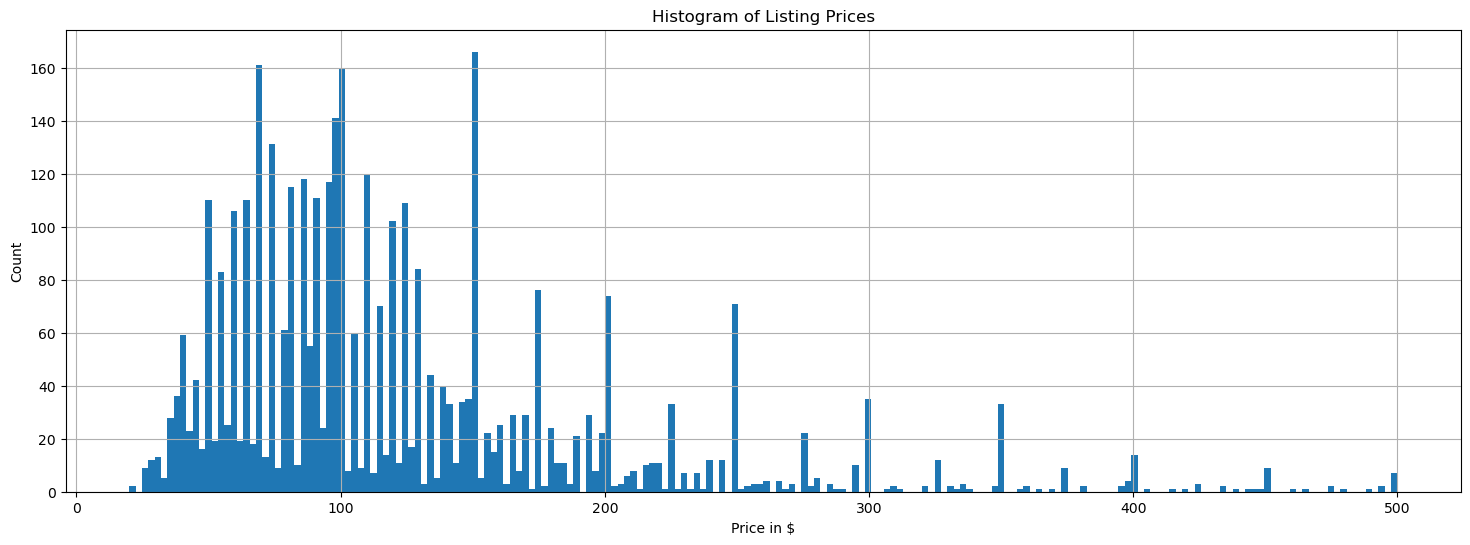

In [24]:
# Assume $500 is the border value above which all are outliers
# So let us remove all above $500 
plt.figure(figsize=(18,6))
df_listing.loc[df_listing.price <= 500].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Price in $')
plt.title('Histogram of Listing Prices')

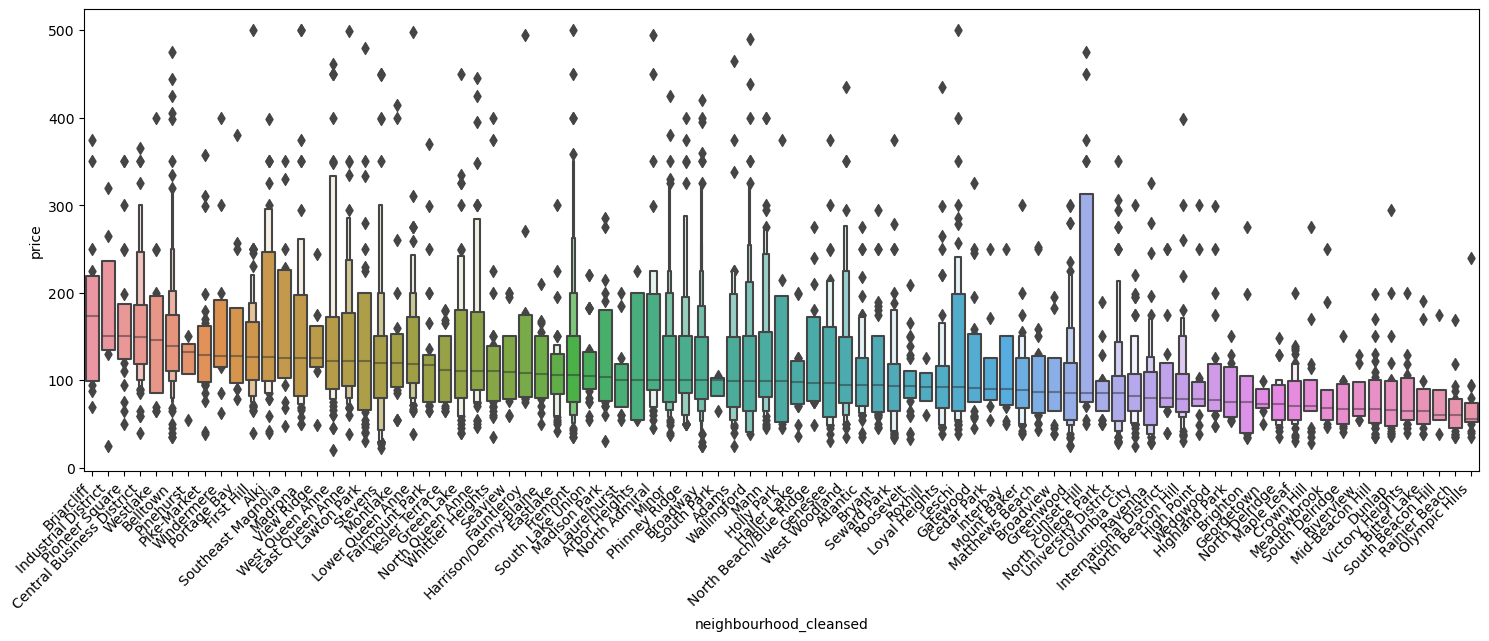

In [25]:
# Neighborhood and Price

plt.figure(figsize=(18,6))
sort_price = df_listing.loc[df_listing.price <= 500]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxenplot(y='price', x='neighbourhood_cleansed', data=df_listing.loc[(df_listing.price <= 500) & (df_listing.price > 0)], 
            order=sort_price)
           
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Answer-2: Highest median prices are around the neighborhoods of 1) Briajrcliff, 2) Pioneer square. Lowest median prices are around the neighborhoods of 1) Olympic Hills, 2) Rainier Beach.

Question-3: How property type influences the homestay price?

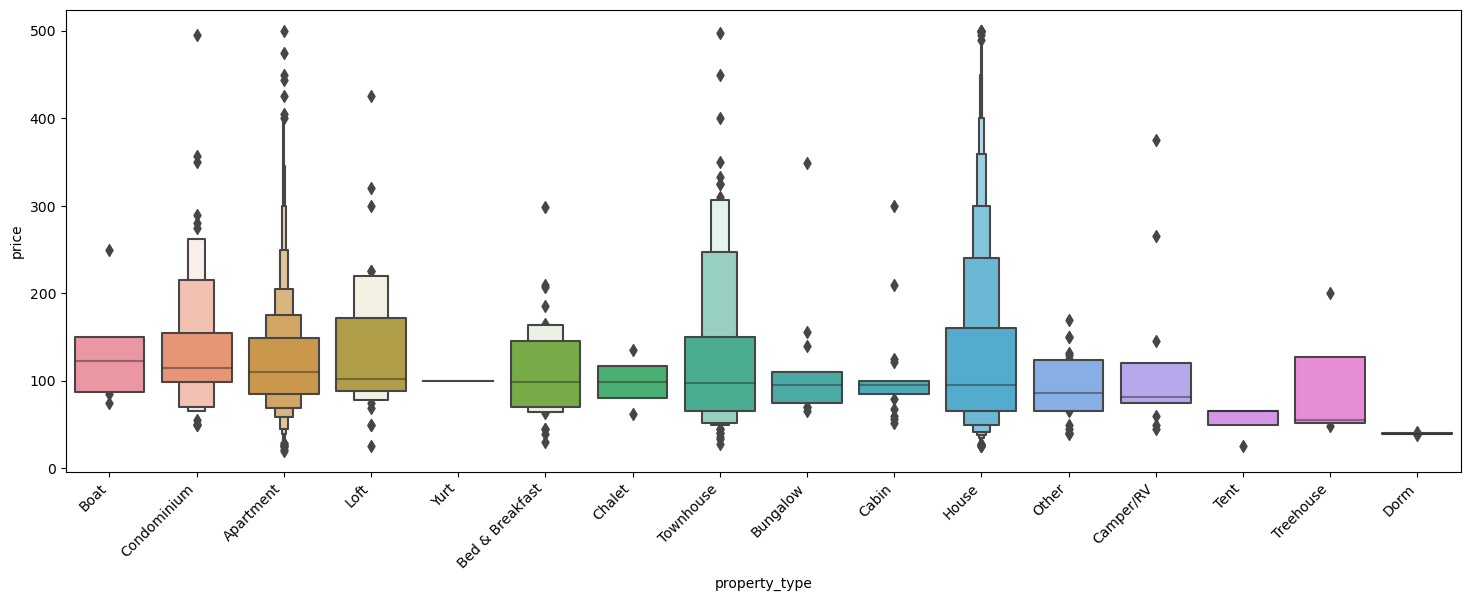

In [26]:
# Property type and Price

plt.figure(figsize=(18,6))
sort_price = df_listing.loc[df_listing.price <= 500]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxenplot(y='price', x='property_type', data=df_listing.loc[(df_listing.price <= 500) & (df_listing.price > 0)], 
            order=sort_price)
           
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Answer-3: It is evident that 'Boat', 'Condominium', 'Apartment' has higher median price than the other property types.

Question-4: How no of bedroom influences the homestay price?

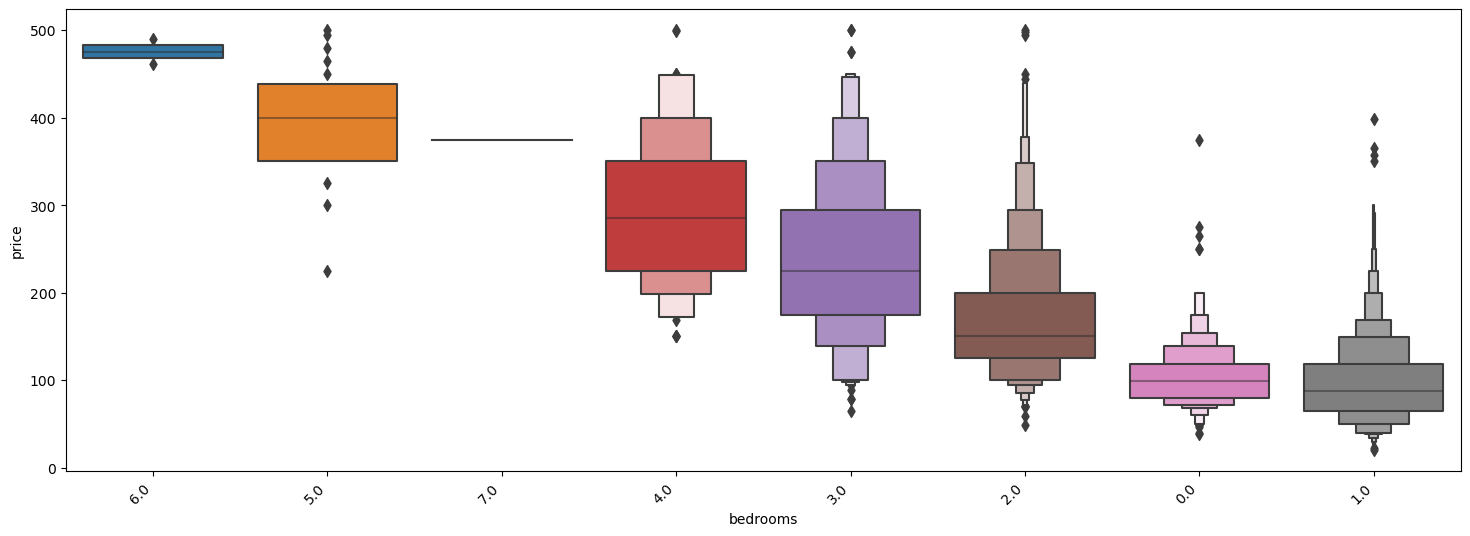

In [27]:
# No of Bedrooms and Price

plt.figure(figsize=(18,6))
sort_price = df_listing.loc[df_listing.price <= 500]\
                    .groupby('bedrooms')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxenplot(y='price', x='bedrooms', data=df_listing.loc[(df_listing.price <= 500) & (df_listing.price > 0)], 
            order=sort_price)
           
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Answer-4: It is very clear that price is more if there more bedrooms. 

Question-5: Which amenities are offered in various airbnb homestay? 

In [28]:
# Check the column amenities                            
df_listing['amenities']

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                              ...                        
3813    {TV,"Cable TV",Internet,"Wireless Internet","A...
3814    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
3815    {"Cable TV","Wireless Internet",Kitchen,"Free ...
3816    {TV,"Wireless Internet",Kitchen,"Free Parking ...
3817    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 3818, dtype: object

This column has comma seperated values with actual name of different facilities and also has "{}". Get unique vales of the facilities. 

In [29]:
df_listing['amenities'].unique()

array(['{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}',
       '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}',
       '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}',
       ...,
       '{"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises",Breakfast,"Pets live on this property",Dog(s),Cat(s),Heating,Washer,Dryer,"Smoke Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}',
       '{TV,"Wireless I

In [30]:
# Need to cleanup this column 
df_listing.amenities = df_listing.amenities.str.replace("[{}]", "").str.replace('"', "")

C:\Users\Anindya Chaudhuri\AppData\Local\Temp\ipykernel_16644\3160417591.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listing.amenities = df_listing.amenities.str.replace("[{}]", "").str.replace('"', "")


In [31]:
# Check the column again
df_listing['amenities']

0       TV,Cable TV,Internet,Wireless Internet,Air Con...
1       TV,Internet,Wireless Internet,Kitchen,Free Par...
2       TV,Cable TV,Internet,Wireless Internet,Air Con...
3       Internet,Wireless Internet,Kitchen,Indoor Fire...
4       TV,Cable TV,Internet,Wireless Internet,Kitchen...
                              ...                        
3813    TV,Cable TV,Internet,Wireless Internet,Air Con...
3814    TV,Cable TV,Internet,Wireless Internet,Kitchen...
3815    Cable TV,Wireless Internet,Kitchen,Free Parkin...
3816    TV,Wireless Internet,Kitchen,Free Parking on P...
3817    TV,Cable TV,Internet,Wireless Internet,Kitchen...
Name: amenities, Length: 3818, dtype: object

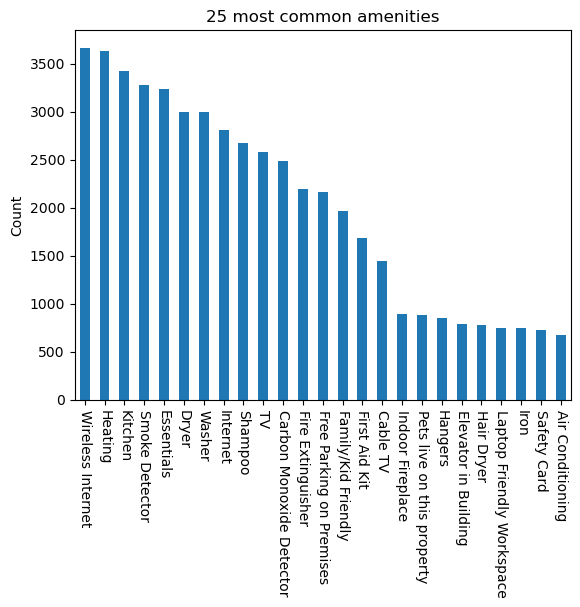

<Figure size 1000x800 with 0 Axes>

In [32]:
#Get top 25 most common amentities
pd.Series(np.concatenate(df_listing['amenities'].map(lambda a: a.split(",")))).value_counts().head(25).plot(kind='bar')
plt.xticks(rotation = -90);
plt.title('25 most common amenities');
plt.ylabel('Count')
plt.figure(figsize = [10, 8])
plt.show()

Answer-5: The most common amenities are - 1) Wireless Internet, 2) Heating, 3)Kitchen, 4) Smoke Detector, 5) Essentials. Also the least common amenities are 1) Elevators, 2) Hangers, 3) pets, 4) Indoor Fireplace, 5) Cable tv.

<AxesSubplot:>

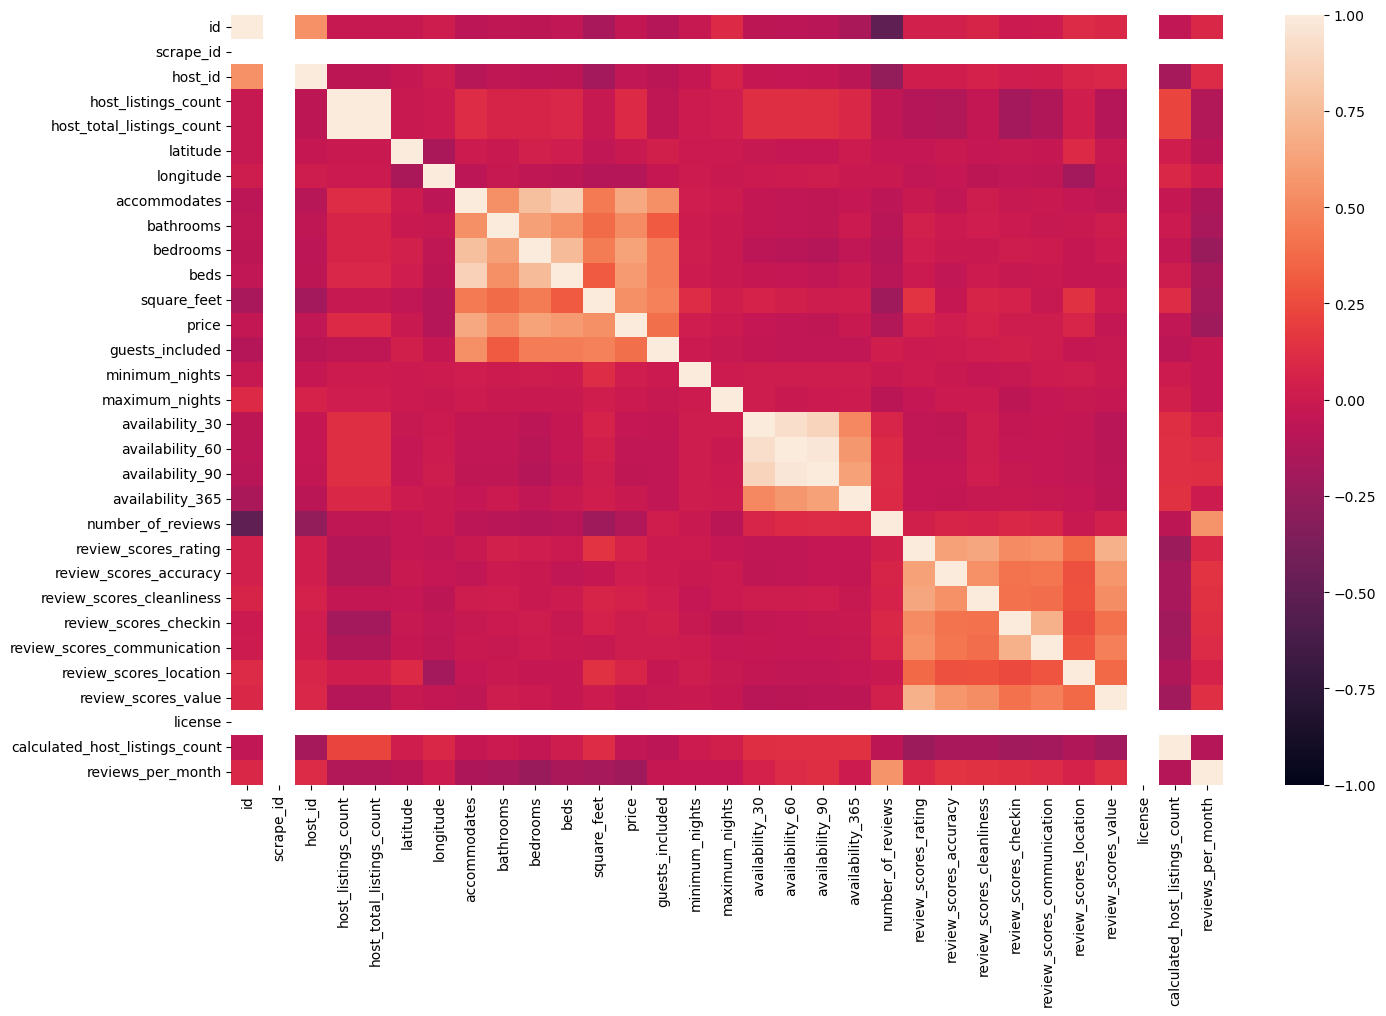

In [33]:
# first let's take a look at the correlations to figure out which features to use for prediction of price
plt.figure(figsize=(16, 10))
sns.heatmap(df_listing.corr(), vmin=-1, vmax=1)

In [34]:
# there are three major areas - the accommodation features, the availability features and the review scores related features. 
# We Will make a smaller set of features as follows: 
df_listing_new = df_listing[["accommodates", "bathrooms", "bedrooms", "beds", "square_feet", "guests_included", 
                              "availability_30", "availability_60", "availability_90", "availability_365", 
                              "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                              "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                              "review_scores_value", "price"]]
df_listing_new.head()

,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,4,1.0,1.0,1.0,NaN,2,14,41,71,346,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0
1,4,1.0,1.0,1.0,NaN,1,13,13,16,291,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.0
2,11,4.5,5.0,7.0,NaN,10,1,6,17,220,97.0,10.0,10.0,10.0,10.0,10.0,10.0,975.0
3,3,1.0,0.0,2.0,NaN,1,0,0,0,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
4,6,2.0,3.0,3.0,NaN,6,30,60,90,365,92.0,9.0,9.0,10.0,10.0,9.0,9.0,450.0


In [35]:
df_listing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 3818 non-null   int64  
 1   bathrooms                    3802 non-null   float64
 2   bedrooms                     3812 non-null   float64
 3   beds                         3817 non-null   float64
 4   square_feet                  97 non-null     float64
 5   guests_included              3818 non-null   int64  
 6   availability_30              3818 non-null   int64  
 7   availability_60              3818 non-null   int64  
 8   availability_90              3818 non-null   int64  
 9   availability_365             3818 non-null   int64  
 10  review_scores_rating         3171 non-null   float64
 11  review_scores_accuracy       3160 non-null   float64
 12  review_scores_cleanliness    3165 non-null   float64
 13  review_scores_chec

In [36]:
# percentage of missing values
missing_values(df_listing_new)

accommodates                   0.000000
bathrooms                      0.004191
bedrooms                       0.001572
beds                           0.000262
square_feet                    0.974594
guests_included                0.000000
availability_30                0.000000
availability_60                0.000000
availability_90                0.000000
availability_365               0.000000
review_scores_rating           0.169460
review_scores_accuracy         0.172342
review_scores_cleanliness      0.171032
review_scores_checkin          0.172342
review_scores_communication    0.170508
review_scores_location         0.171556
review_scores_value            0.171818
price                          0.000000
dtype: float64

In [37]:
# we can drop square_feet as 97% values are missing
df_listing_new.drop(["square_feet"], axis=1, inplace=True)

C:\Users\Anindya Chaudhuri\AppData\Local\Temp\ipykernel_16644\719291652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listing_new.drop(["square_feet"], axis=1, inplace=True)


In [38]:
df_listing_new.describe()

,accommodates,bathrooms,bedrooms,beds,guests_included,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000
mean,3.349398,1.259469,1.307712,1.735394,1.672603,16.786276,36.814825,58.082504,244.772656,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,127.976166
std,1.977599,0.590369,0.883395,1.139480,1.311040,12.173637,23.337541,34.063845,126.772526,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,90.250022
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,20.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,13.000000,28.000000,124.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,75.000000
50%,3.000000,1.000000,1.000000,1.000000,1.000000,20.000000,46.000000,73.000000,308.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000
75%,4.000000,1.000000,2.000000,2.000000,2.000000,30.000000,59.000000,89.000000,360.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.000000
max,16.000000,8.000000,7.000000,15.000000,15.000000,30.000000,60.000000,90.000000,365.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1000.000000


Observation: Very less records for reviews, probably people missed or not provided comments. 

In [39]:
# We can fill with mean values 
df_listing_new.fillna(df_listing_new.mean(), inplace=True)
df_listing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 3818 non-null   int64  
 1   bathrooms                    3818 non-null   float64
 2   bedrooms                     3818 non-null   float64
 3   beds                         3818 non-null   float64
 4   guests_included              3818 non-null   int64  
 5   availability_30              3818 non-null   int64  
 6   availability_60              3818 non-null   int64  
 7   availability_90              3818 non-null   int64  
 8   availability_365             3818 non-null   int64  
 9   review_scores_rating         3818 non-null   float64
 10  review_scores_accuracy       3818 non-null   float64
 11  review_scores_cleanliness    3818 non-null   float64
 12  review_scores_checkin        3818 non-null   float64
 13  review_scores_comm

C:\Users\Anindya Chaudhuri\AppData\Local\Temp\ipykernel_16644\1525143192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listing_new.fillna(df_listing_new.mean(), inplace=True)


Step-4: Evaluation and Modeling

In [40]:
# Prediction

# set features for X and y 
X = df_listing_new.drop(["price"], axis=1)
y = df_listing_new["price"]

In [41]:
# train and test split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

In [42]:
# set up a pipeline model with StandardScaler and LineerRegression
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

In [43]:
# fit the model and predict on the test data 
model.fit(X_train, y_train)
y_test_preds = model.predict(X_test)

In [44]:
# check the model score 
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was 0.5180612422568063 on 764 values.'

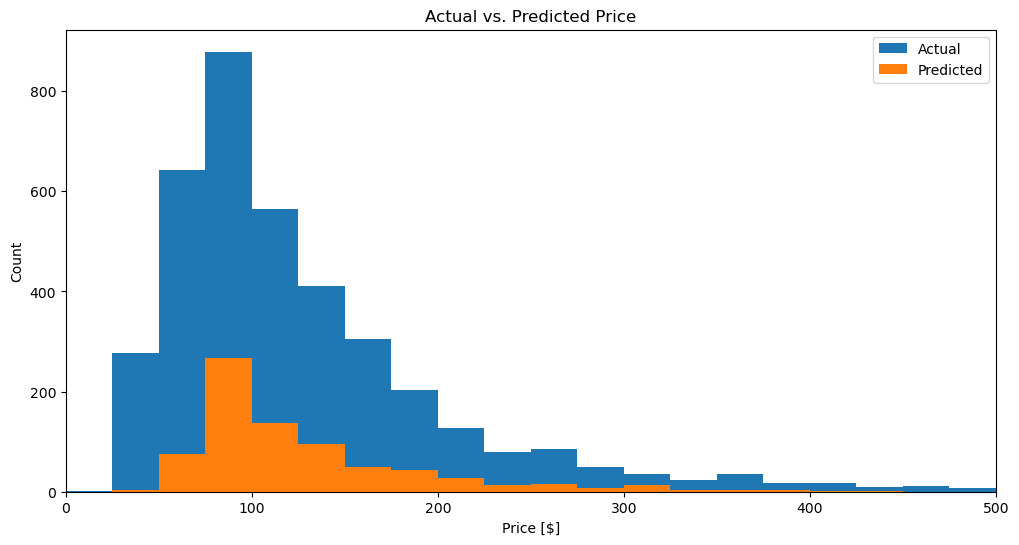

In [46]:
# trying to compare the true prices and the predicted prizes 
plt.figure(figsize=(12,6))
bins = np.arange(0, y.max()+25, 25)
plt.xlim(0, 500)
plt.title("Actual vs. Predicted Price")
plt.xlabel("Price [$]")
plt.ylabel("Count")
plt.hist(x=y, bins=bins, label="Actual")
plt.hist(x=y_test_preds, bins=bins, label="Predicted")
plt.legend()

We might need to have more training data to improve further. But the overall trend appears very similar. So we can say that the prediction on the price is quite possible with the features we have selected.